In [1]:
import json
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import itertools
from collections import Counter
from matplotlib_venn import venn3
import matplotlib.font_manager as fm
import seaborn as sns

In [2]:
import os
path = "D:/Coding/Caleb"
os.chdir(path)
os.getcwd()

'D:\\Coding\\Caleb'

In [3]:
df_time = pd.read_json('./data/time.json')
df_general = pd.read_json('./data/general.json')
df_popularity = pd.read_json('./data/popularity.json')
df_combined = pd.concat([df_time, df_general, df_popularity])

In [4]:
df_combined.shape

(1316, 21)

In [5]:
df_combined.head()

,note_id,type,title,desc,video_url,time,last_update_time,user_id,nickname,avatar,...,collected_count,comment_count,share_count,ip_location,image_list,tag_list,last_modify_ts,note_url,source_keyword,xsec_token
0,67c27a66000000000603d771,video,是谁的卡册来了,给大家准备的福福来啦\n﻿#恋与深空[话题]#﻿ ﻿#拆卡[话题]#﻿ ﻿#二创[话题]#﻿...,http://sns-video-bd.xhscdn.com/spectrum/1040g3...,1740798566000,2025-03-01 03:09:27,666c6100000000000d026ec1,芝士塔爱拆卡,https://sns-avatar-qc.xhscdn.com/avatar/1040g2...,...,0,0,0,河北,http://sns-webpic-qc.xhscdn.com/202503011110/e...,"恋与深空,拆卡,二创,沈星回,黎深,祁煜,秦彻,夏以昼,卡册",1740798696457,https://www.xiaohongshu.com/explore/67c27a6600...,夏以昼,ABVLOM-EdRyjzTq-CTRHisAijIbuC72NfAPE0tj4BMt8k=
1,67c27a45000000002903da90,normal,哇塞，这就是你们温良哥推吗，说不过就开始举报了\n#沈星回[话题]# #夏以昼的女人是小偷...,哇塞，这就是你们温良哥推吗，说不过就开始举报了\n#沈星回[话题]# #夏以昼的女人是小偷...,,1740798533000,2025-03-01 03:08:53,60587996000000000101f0c5,沈珏,https://sns-avatar-qc.xhscdn.com/avatar/1040g2...,...,0,0,0,江苏,http://sns-webpic-qc.xhscdn.com/202503011110/9...,"沈星回,夏以昼的女人是小偷,夏以昼的女人不读书,夏以昼的女人吃拼好饭中毒",1740798696461,https://www.xiaohongshu.com/explore/67c27a4500...,夏以昼,ABVLOM-EdRyjzTq-CTRHisApCjW0wPtJISwsUbG3QDuuU=
2,67c27a2c0000000006028cc9,normal,就这么和夏以昼叱咤风云😼,过了两年，妹也偷偷去参加了比武大会，各家很快就认出来妹用的招式是夏以昼的影子\n妹和哥一样默...,,1740798508000,2025-03-01 03:08:29,632510f2000000002303c666,下一周有下雨天,https://sns-avatar-qc.xhscdn.com/avatar/1040g2...,...,0,0,0,广西,http://sns-webpic-qc.xhscdn.com/202503011110/1...,"恋与深空夏以昼,夏以昼,恋与深空",1740798696480,https://www.xiaohongshu.com/explore/67c27a2c00...,夏以昼,ABVLOM-EdRyjzTq-CTRHisAv4fqr6PB1odEnJgcrh5a4Q=
3,67c2783b000000000602822a,normal,模仿夏以昼签名被抓,#恋与深空夏以昼[话题]# #夏以昼[话题]# #talkmaker[话题]#,,1740798011000,2025-03-01 03:00:12,66067a58000000000d025499,商秋宴,https://sns-avatar-qc.xhscdn.com/avatar/1040g2...,...,1,4,1,湖北,http://sns-webpic-qc.xhscdn.com/202503011111/3...,"恋与深空夏以昼,夏以昼,talkmaker",1740798696497,https://www.xiaohongshu.com/explore/67c2783b00...,夏以昼,ABVLOM-EdRyjzTq-CTRHisAlZE1SQe6_FmryFtXTXCtuQ=
4,67c275e8000000002602dfc2,normal,DeepSeek造福人类[色色R]终于说出来了，夏以昼你不是胆小鬼#恋与深空夏以昼[话题]#,DeepSeek造福人类[色色R]终于说出来了，夏以昼你不是胆小鬼#恋与深空夏以昼[话题]#,,1740797416000,2025-03-01 02:58:17,5fb658300000000001005cb4,圈圈,https://sns-avatar-qc.xhscdn.com/avatar/0dd6f7...,...,0,0,0,北京,http://sns-webpic-qc.xhscdn.com/202503011111/4...,恋与深空夏以昼,1740798696517,https://www.xiaohongshu.com/explore/67c275e800...,夏以昼,ABVLOM-EdRyjzTq-CTRHisAhBTjTtlYrB_ztEHG20whY8=


In [6]:
df_combined.describe(include=['object']) 

,note_id,type,title,desc,video_url,user_id,nickname,avatar,liked_count,collected_count,comment_count,share_count,ip_location,image_list,tag_list,note_url,source_keyword,xsec_token
count,1316,1316,1316,1316,1316,1316,1316,1316,1316,1316,1316,1316,1316,1316,1316,1316,1316,1316
unique,869,2,863,834,171,702,677,700,620,488,441,533,45,1316,492,904,2,904
top,67bbc472000000000d01790d,normal,恋与深空/夏以昼,#夏以昼[话题]#,,5b0ac7d011be1011881b6cc6,momo,https://sns-avatar-qc.xhscdn.com/avatar/1040g2...,10+,0,0,0,,http://sns-webpic-qc.xhscdn.com/202503011157/6...,"恋与深空,夏以昼",https://www.xiaohongshu.com/explore/679c8b7500...,恋与深空夏以昼,ABo4VxCS3ji62fWCE7-uJQZbK0yy6yclCGu7UqIGSEMtU=
freq,5,1122,5,10,1122,27,38,27,56,176,153,227,275,1,106,4,659,4


In [7]:
#note_id and note_url is not 1-1 match
df_combined["id_url_combi"] = df_combined["note_id"] + '--' + df_combined["note_url"]
df_check = df_combined.drop_duplicates(subset="id_url_combi", keep="first")
dupes_note_id = df_check[df_check.duplicated("note_id", keep=False)]

In [8]:
dupes_note_id.sort_values("note_id").head()

,note_id,type,title,desc,video_url,time,last_update_time,user_id,nickname,avatar,...,comment_count,share_count,ip_location,image_list,tag_list,last_modify_ts,note_url,source_keyword,xsec_token,id_url_combi
160,678327cf000000000203f6eb,normal,感觉叠把夏以昼拖这么久蛮有意思的,如果他一开始就是白切黑上场，或者只留了个名字，大家也不会应激，但恰恰就是他这个人不仅给了留了...,,1736648655000,2025-02-17 10:22:32,6567665300000000200337b8,kingher,https://sns-avatar-qc.xhscdn.com/avatar/1040g2...,...,813,703,浙江,http://sns-webpic-qc.xhscdn.com/202503011212/9...,"恋与深空,夏以昼回航,夏以昼",1740802413374,https://www.xiaohongshu.com/explore/678327cf00...,夏以昼,AB5-itMsb5o9MDRzQd-MGjLuMeLw0wX2Lr3hJXdLzBhQ4=,678327cf000000000203f6eb--https://www.xiaohong...
197,678327cf000000000203f6eb,normal,感觉叠把夏以昼拖这么久蛮有意思的,如果他一开始就是白切黑上场，或者只留了个名字，大家也不会应激，但恰恰就是他这个人不仅给了留了...,,1736648655000,2025-02-17 10:22:32,6567665300000000200337b8,kingher,https://sns-avatar-qc.xhscdn.com/avatar/1040g2...,...,10+,10+,浙江,http://sns-webpic-qc.xhscdn.com/202503011119/5...,"恋与深空,夏以昼回航,夏以昼",1740799145898,https://www.xiaohongshu.com/explore/678327cf00...,夏以昼,ABzRwYHfzHjFMxmNxaYiiY7IK_NOerk03cS-uG3weqf1Q=,678327cf000000000203f6eb--https://www.xiaohong...
182,67a47be10000000028028397,normal,夏以昼你在做什么,#恋与深空夏以昼[话题]# #哥推[话题]#,,1738832865000,2025-02-19 16:00:01,5f6f4d690000000001003878,今天吃什么,https://sns-avatar-qc.xhscdn.com/avatar/5f6f4d...,...,10+,10+,山东,http://sns-webpic-qc.xhscdn.com/202503011118/f...,"恋与深空夏以昼,哥推",1740799145467,https://www.xiaohongshu.com/explore/67a47be100...,夏以昼,ABcpYqdVVE83Xm6WD5Aws_czmg6rUv_NIMj-ZvJRo-0IY=,67a47be10000000028028397--https://www.xiaohong...
112,67a47be10000000028028397,normal,夏以昼你在做什么,#恋与深空夏以昼[话题]# #哥推[话题]#,,1738832865000,2025-02-19 16:00:01,5f6f4d690000000001003878,今天吃什么,https://sns-avatar-qc.xhscdn.com/avatar/5f6f4d...,...,210,231,山东,http://sns-webpic-qc.xhscdn.com/202503011210/6...,"恋与深空夏以昼,哥推",1740802269743,https://www.xiaohongshu.com/explore/67a47be100...,夏以昼,AB6erGbRtrkM_8GrWWpUBhnyYsMOD4FIcNnQ-IwnYemPM=,67a47be10000000028028397--https://www.xiaohong...
217,67ad8f300000000018006059,normal,跟我回去十八岁，不要被命运找到,“我们不要在这里，跟我回去十八岁，躲到海棠树下，不要被命运找到。”\n\t\n@amaryl...,,1739427632000,2025-02-13 14:27:12,602debae000000000101de91,梨梨梨梨梨,https://sns-avatar-qc.xhscdn.com/avatar/1040g2...,...,10+,1千+,山东,http://sns-webpic-qc.xhscdn.com/202503011119/5...,"夏以昼,恋与深空,恋与深空写真",1740799196547,https://www.xiaohongshu.com/explore/67ad8f3000...,夏以昼,ABvrUaZH01Wbj349wboViyrtlfp8WSDnU2dfiehIXC87w=,67ad8f300000000018006059--https://www.xiaohong...


In [9]:
dupes_note_id.sort_values("note_id")[["note_id","note_url","title","user_id"]].iloc[0,1]

'https://www.xiaohongshu.com/explore/678327cf000000000203f6eb?xsec_token=AB5-itMsb5o9MDRzQd-MGjLuMeLw0wX2Lr3hJXdLzBhQ4=&xsec_source=pc_search'

In [10]:
dupes_note_id.sort_values("note_id")[["note_id","note_url","title","user_id"]].iloc[1,1]

'https://www.xiaohongshu.com/explore/678327cf000000000203f6eb?xsec_token=ABzRwYHfzHjFMxmNxaYiiY7IK_NOerk03cS-uG3weqf1Q=&xsec_source=pc_search'

In [11]:
'''base on above observation, notice that the link difference is due to different xsec-token, 
which is not related to the scraped content, therefore, we should simply remove duplicates, 
using note_id as the identifier'''

'base on above observation, notice that the link difference is due to different xsec-token, \nwhich is not related to the scraped content, therefore, we should simply remove duplicates, \nusing note_id as the identifier'

In [12]:
df = df_combined.drop_duplicates('note_id')
df.describe(include=['object']) 

,note_id,type,title,desc,video_url,user_id,nickname,avatar,liked_count,collected_count,comment_count,share_count,ip_location,image_list,tag_list,note_url,source_keyword,xsec_token,id_url_combi
count,869,869,869,869,869,869,869,869,869,869,869,869,869,869,869,869,869,869,869
unique,869,2,863,834,171,702,677,700,498,416,413,377,45,869,492,869,2,869,869
top,67c013b6000000002901196b,normal,谁要来定制夏以昼的原声语音,#夏以昼[话题]#,,5b0ac7d011be1011881b6cc6,夏以昼,https://sns-avatar-qc.xhscdn.com/avatar/1040g2...,10+,0,0,0,,http://sns-webpic-qc.xhscdn.com/202503011157/0...,"恋与深空,夏以昼",https://www.xiaohongshu.com/explore/67c013b600...,夏以昼,ABWFutQa255dEGxnot92Bfh6MwVEquORSYxdADUJ6qL4U=,67c013b6000000002901196b--https://www.xiaohong...
freq,1,699,2,8,699,25,28,25,50,158,132,202,181,1,59,1,509,1,1


In [13]:
df = df.copy()
df["time"] = pd.to_datetime(df["time"], unit="ms", origin="unix", utc=True).dt.tz_localize(None)
df["last_modify_ts"] = pd.to_datetime(df["last_modify_ts"], unit="ms", origin="unix", utc=True).dt.tz_localize(None)
df.head()

,note_id,type,title,desc,video_url,time,last_update_time,user_id,nickname,avatar,...,comment_count,share_count,ip_location,image_list,tag_list,last_modify_ts,note_url,source_keyword,xsec_token,id_url_combi
0,67c27a66000000000603d771,video,是谁的卡册来了,给大家准备的福福来啦\n﻿#恋与深空[话题]#﻿ ﻿#拆卡[话题]#﻿ ﻿#二创[话题]#﻿...,http://sns-video-bd.xhscdn.com/spectrum/1040g3...,2025-03-01 03:09:26,2025-03-01 03:09:27,666c6100000000000d026ec1,芝士塔爱拆卡,https://sns-avatar-qc.xhscdn.com/avatar/1040g2...,...,0,0,河北,http://sns-webpic-qc.xhscdn.com/202503011110/e...,"恋与深空,拆卡,二创,沈星回,黎深,祁煜,秦彻,夏以昼,卡册",2025-03-01 03:11:36.457,https://www.xiaohongshu.com/explore/67c27a6600...,夏以昼,ABVLOM-EdRyjzTq-CTRHisAijIbuC72NfAPE0tj4BMt8k=,67c27a66000000000603d771--https://www.xiaohong...
1,67c27a45000000002903da90,normal,哇塞，这就是你们温良哥推吗，说不过就开始举报了\n#沈星回[话题]# #夏以昼的女人是小偷...,哇塞，这就是你们温良哥推吗，说不过就开始举报了\n#沈星回[话题]# #夏以昼的女人是小偷...,,2025-03-01 03:08:53,2025-03-01 03:08:53,60587996000000000101f0c5,沈珏,https://sns-avatar-qc.xhscdn.com/avatar/1040g2...,...,0,0,江苏,http://sns-webpic-qc.xhscdn.com/202503011110/9...,"沈星回,夏以昼的女人是小偷,夏以昼的女人不读书,夏以昼的女人吃拼好饭中毒",2025-03-01 03:11:36.461,https://www.xiaohongshu.com/explore/67c27a4500...,夏以昼,ABVLOM-EdRyjzTq-CTRHisApCjW0wPtJISwsUbG3QDuuU=,67c27a45000000002903da90--https://www.xiaohong...
2,67c27a2c0000000006028cc9,normal,就这么和夏以昼叱咤风云😼,过了两年，妹也偷偷去参加了比武大会，各家很快就认出来妹用的招式是夏以昼的影子\n妹和哥一样默...,,2025-03-01 03:08:28,2025-03-01 03:08:29,632510f2000000002303c666,下一周有下雨天,https://sns-avatar-qc.xhscdn.com/avatar/1040g2...,...,0,0,广西,http://sns-webpic-qc.xhscdn.com/202503011110/1...,"恋与深空夏以昼,夏以昼,恋与深空",2025-03-01 03:11:36.480,https://www.xiaohongshu.com/explore/67c27a2c00...,夏以昼,ABVLOM-EdRyjzTq-CTRHisAv4fqr6PB1odEnJgcrh5a4Q=,67c27a2c0000000006028cc9--https://www.xiaohong...
3,67c2783b000000000602822a,normal,模仿夏以昼签名被抓,#恋与深空夏以昼[话题]# #夏以昼[话题]# #talkmaker[话题]#,,2025-03-01 03:00:11,2025-03-01 03:00:12,66067a58000000000d025499,商秋宴,https://sns-avatar-qc.xhscdn.com/avatar/1040g2...,...,4,1,湖北,http://sns-webpic-qc.xhscdn.com/202503011111/3...,"恋与深空夏以昼,夏以昼,talkmaker",2025-03-01 03:11:36.497,https://www.xiaohongshu.com/explore/67c2783b00...,夏以昼,ABVLOM-EdRyjzTq-CTRHisAlZE1SQe6_FmryFtXTXCtuQ=,67c2783b000000000602822a--https://www.xiaohong...
4,67c275e8000000002602dfc2,normal,DeepSeek造福人类[色色R]终于说出来了，夏以昼你不是胆小鬼#恋与深空夏以昼[话题]#,DeepSeek造福人类[色色R]终于说出来了，夏以昼你不是胆小鬼#恋与深空夏以昼[话题]#,,2025-03-01 02:50:16,2025-03-01 02:58:17,5fb658300000000001005cb4,圈圈,https://sns-avatar-qc.xhscdn.com/avatar/0dd6f7...,...,0,0,北京,http://sns-webpic-qc.xhscdn.com/202503011111/4...,恋与深空夏以昼,2025-03-01 03:11:36.517,https://www.xiaohongshu.com/explore/67c275e800...,夏以昼,ABVLOM-EdRyjzTq-CTRHisAhBTjTtlYrB_ztEHG20whY8=,67c275e8000000002602dfc2--https://www.xiaohong...


In [14]:
#try to understand difference between time, last_update_time and last_modify_ts
'''time shoule be first-time upload time,
last update_time is last edit time. When it is very close to first upload, suspect it might be due to system delay
last modify_ts is my scraping time without timezone(+8), can drop'''

'time shoule be first-time upload time,\nlast update_time is last edit time. When it is very close to first upload, suspect it might be due to system delay\nlast modify_ts is my scraping time without timezone(+8), can drop'

In [15]:
df.drop(columns=["video_url","avatar","image_list","last_modify_ts","xsec_token","id_url_combi"], inplace=True)

In [16]:
df.head()

,note_id,type,title,desc,time,last_update_time,user_id,nickname,liked_count,collected_count,comment_count,share_count,ip_location,tag_list,note_url,source_keyword
0,67c27a66000000000603d771,video,是谁的卡册来了,给大家准备的福福来啦\n﻿#恋与深空[话题]#﻿ ﻿#拆卡[话题]#﻿ ﻿#二创[话题]#﻿...,2025-03-01 03:09:26,2025-03-01 03:09:27,666c6100000000000d026ec1,芝士塔爱拆卡,0,0,0,0,河北,"恋与深空,拆卡,二创,沈星回,黎深,祁煜,秦彻,夏以昼,卡册",https://www.xiaohongshu.com/explore/67c27a6600...,夏以昼
1,67c27a45000000002903da90,normal,哇塞，这就是你们温良哥推吗，说不过就开始举报了\n#沈星回[话题]# #夏以昼的女人是小偷...,哇塞，这就是你们温良哥推吗，说不过就开始举报了\n#沈星回[话题]# #夏以昼的女人是小偷...,2025-03-01 03:08:53,2025-03-01 03:08:53,60587996000000000101f0c5,沈珏,0,0,0,0,江苏,"沈星回,夏以昼的女人是小偷,夏以昼的女人不读书,夏以昼的女人吃拼好饭中毒",https://www.xiaohongshu.com/explore/67c27a4500...,夏以昼
2,67c27a2c0000000006028cc9,normal,就这么和夏以昼叱咤风云😼,过了两年，妹也偷偷去参加了比武大会，各家很快就认出来妹用的招式是夏以昼的影子\n妹和哥一样默...,2025-03-01 03:08:28,2025-03-01 03:08:29,632510f2000000002303c666,下一周有下雨天,0,0,0,0,广西,"恋与深空夏以昼,夏以昼,恋与深空",https://www.xiaohongshu.com/explore/67c27a2c00...,夏以昼
3,67c2783b000000000602822a,normal,模仿夏以昼签名被抓,#恋与深空夏以昼[话题]# #夏以昼[话题]# #talkmaker[话题]#,2025-03-01 03:00:11,2025-03-01 03:00:12,66067a58000000000d025499,商秋宴,12,1,4,1,湖北,"恋与深空夏以昼,夏以昼,talkmaker",https://www.xiaohongshu.com/explore/67c2783b00...,夏以昼
4,67c275e8000000002602dfc2,normal,DeepSeek造福人类[色色R]终于说出来了，夏以昼你不是胆小鬼#恋与深空夏以昼[话题]#,DeepSeek造福人类[色色R]终于说出来了，夏以昼你不是胆小鬼#恋与深空夏以昼[话题]#,2025-03-01 02:50:16,2025-03-01 02:58:17,5fb658300000000001005cb4,圈圈,0,0,0,0,北京,恋与深空夏以昼,https://www.xiaohongshu.com/explore/67c275e800...,夏以昼


In [17]:
#tidy up time columns for later analysis
df.sort_values('time',ascending=True)[['note_id','title','desc','time']] #look at time range

,note_id,title,desc,time
418,6571ddc9000000003803564a,不敢想夏以昼当男主的话五星卡有多刺激,扯开外套后对身上的每一道疤痕怎么来的都了如指掌，小时候摸起来只觉得凸起来有点好玩的喉结，现在...,2023-12-07 14:59:21
20,65b4907f000000002c03fef6,哥哥，有个简单的问题,#恋与深空[话题]# #恋与深空万颗茶叶蛋求安利[话题]##夏以昼[话题]#\n嘿嘿，很适配的☺️,2024-01-27 05:11:27
291,65c2707a000000002b03f68c,左滑看夏以昼黑化,#恋与深空[话题]# #夏以昼[话题]#,2024-02-07 01:01:31
137,65f42bed00000000120221cf,【夏以昼】贫穷病,穷人的不可思议之处：\n上帝让这群人毫无指望，却又从不反抗，\n就像他总是会把解药放在生病的...,2024-03-15 11:07:25
142,665f77d8000000000d00f6f5,夏以昼在国乙夜场当众丢脸,哭的好丑，但是很想发出来，太巧了哥哥，好有宿命感\n#春色撩人国乙[话题]# #北京春色撩人...,2024-06-04 20:23:52
...,...,...,...,...
1,67c27a45000000002903da90,哇塞，这就是你们温良哥推吗，说不过就开始举报了\n#沈星回[话题]# #夏以昼的女人是小偷...,哇塞，这就是你们温良哥推吗，说不过就开始举报了\n#沈星回[话题]# #夏以昼的女人是小偷...,2025-03-01 03:08:53
0,67c27a66000000000603d771,是谁的卡册来了,给大家准备的福福来啦\n﻿#恋与深空[话题]#﻿ ﻿#拆卡[话题]#﻿ ﻿#二创[话题]#﻿...,2025-03-01 03:09:26
223,67c27a9a000000002802b229,想知道小苹果们最喜欢夏以昼哪套衣服or卡面[哇R]\n#恋与深空夏以昼[话题]# #夏以昼[...,想知道小苹果们最喜欢夏以昼哪套衣服or卡面[哇R]\n#恋与深空夏以昼[话题]# #夏以昼[...,2025-03-01 03:10:18
222,67c27b9f0000000029016f71,至此，夏以昼酸涩的暗恋结束在25岁,#恋与深空[话题]#\n#夏以昼[话题]#,2025-03-01 03:14:39


In [18]:
df["creation_date"] = df["time"].dt.date
df["creation_time"] = df["time"].dt.time
df["creation_year_month"] = df["time"].dt.to_period('M')
df["time_diff"] = (df["time"] - df["last_update_time"]).abs()

In [19]:
df.sort_values("time_diff",ascending=False)[["note_id","time_diff","time","last_update_time"]]

,note_id,time_diff,time,last_update_time
319,66a06787000000002701f70e,206 days 09:49:02,2024-07-24 02:31:35,2025-02-15 12:20:37
90,66dffc490000000012010f79,132 days 02:20:06,2024-09-10 07:59:05,2025-01-20 10:19:11
74,669fafaa000000002701e6b7,112 days 20:02:57,2024-07-23 13:27:06,2024-11-13 09:30:03
380,677162d1000000000902ea69,59 days 22:27:55,2024-12-29 14:55:13,2025-02-27 13:23:08
296,677428100000000014021541,59 days 09:59:49,2024-12-31 17:21:20,2025-03-01 03:21:09
...,...,...,...,...
331,678fcb2c000000001902dc67,0 days 00:00:00,2025-01-21 16:28:28,2025-01-21 16:28:28
330,679c743a000000002503e250,0 days 00:00:00,2025-01-31 06:56:58,2025-01-31 06:56:58
290,67c1ac11000000000603b605,0 days 00:00:00,2025-02-28 12:29:05,2025-02-28 12:29:05
293,67c1a8b6000000000903b8f4,0 days 00:00:00,2025-02-28 12:14:46,2025-02-28 12:14:46


In [20]:
#time diff is too wide for certain ntoes, unlikely to update a note again after nearly 1 year
#try to check whether last update is latest comment time
df.sort_values("time_diff",ascending=False).iloc[0]

note_id                                         66a06787000000002701f70e
type                                                              normal
title                                                   存档一些ao3神迹（恋与深空）💎
desc                   都是细细品读800遍甚至已经下载到kindle拜读的程度🙏🏻同人女是世界上最宝贵的宝藏🧚🏻‍...
time                                                 2024-07-24 02:31:35
last_update_time                                     2025-02-15 12:20:37
user_id                                         565c2e559eb5785dbe5c784c
nickname                                                          虾玉你还活卓
liked_count                                                         2.8万
collected_count                                                     2.9万
comment_count                                                       2148
share_count                                                         3005
ip_location                                                           安徽
tag_list                                           

In [21]:
'''after manual check, confirm last_update time is indeed last edit time of notes'''

'after manual check, confirm last_update time is indeed last edit time of notes'

In [22]:
df["content_edit"] = df["time_diff"] > pd.Timedelta(minutes=10)

In [23]:
df.head(5)

,note_id,type,title,desc,time,last_update_time,user_id,nickname,liked_count,collected_count,...,share_count,ip_location,tag_list,note_url,source_keyword,creation_date,creation_time,creation_year_month,time_diff,content_edit
0,67c27a66000000000603d771,video,是谁的卡册来了,给大家准备的福福来啦\n﻿#恋与深空[话题]#﻿ ﻿#拆卡[话题]#﻿ ﻿#二创[话题]#﻿...,2025-03-01 03:09:26,2025-03-01 03:09:27,666c6100000000000d026ec1,芝士塔爱拆卡,0,0,...,0,河北,"恋与深空,拆卡,二创,沈星回,黎深,祁煜,秦彻,夏以昼,卡册",https://www.xiaohongshu.com/explore/67c27a6600...,夏以昼,2025-03-01,03:09:26,2025-03,0 days 00:00:01,False
1,67c27a45000000002903da90,normal,哇塞，这就是你们温良哥推吗，说不过就开始举报了\n#沈星回[话题]# #夏以昼的女人是小偷...,哇塞，这就是你们温良哥推吗，说不过就开始举报了\n#沈星回[话题]# #夏以昼的女人是小偷...,2025-03-01 03:08:53,2025-03-01 03:08:53,60587996000000000101f0c5,沈珏,0,0,...,0,江苏,"沈星回,夏以昼的女人是小偷,夏以昼的女人不读书,夏以昼的女人吃拼好饭中毒",https://www.xiaohongshu.com/explore/67c27a4500...,夏以昼,2025-03-01,03:08:53,2025-03,0 days 00:00:00,False
2,67c27a2c0000000006028cc9,normal,就这么和夏以昼叱咤风云😼,过了两年，妹也偷偷去参加了比武大会，各家很快就认出来妹用的招式是夏以昼的影子\n妹和哥一样默...,2025-03-01 03:08:28,2025-03-01 03:08:29,632510f2000000002303c666,下一周有下雨天,0,0,...,0,广西,"恋与深空夏以昼,夏以昼,恋与深空",https://www.xiaohongshu.com/explore/67c27a2c00...,夏以昼,2025-03-01,03:08:28,2025-03,0 days 00:00:01,False
3,67c2783b000000000602822a,normal,模仿夏以昼签名被抓,#恋与深空夏以昼[话题]# #夏以昼[话题]# #talkmaker[话题]#,2025-03-01 03:00:11,2025-03-01 03:00:12,66067a58000000000d025499,商秋宴,12,1,...,1,湖北,"恋与深空夏以昼,夏以昼,talkmaker",https://www.xiaohongshu.com/explore/67c2783b00...,夏以昼,2025-03-01,03:00:11,2025-03,0 days 00:00:01,False
4,67c275e8000000002602dfc2,normal,DeepSeek造福人类[色色R]终于说出来了，夏以昼你不是胆小鬼#恋与深空夏以昼[话题]#,DeepSeek造福人类[色色R]终于说出来了，夏以昼你不是胆小鬼#恋与深空夏以昼[话题]#,2025-03-01 02:50:16,2025-03-01 02:58:17,5fb658300000000001005cb4,圈圈,0,0,...,0,北京,恋与深空夏以昼,https://www.xiaohongshu.com/explore/67c275e800...,夏以昼,2025-03-01,02:50:16,2025-03,0 days 00:08:01,False


In [24]:
df["tags"] = df["tag_list"].str.split(",\s*")

In [25]:
df.head()

,note_id,type,title,desc,time,last_update_time,user_id,nickname,liked_count,collected_count,...,ip_location,tag_list,note_url,source_keyword,creation_date,creation_time,creation_year_month,time_diff,content_edit,tags
0,67c27a66000000000603d771,video,是谁的卡册来了,给大家准备的福福来啦\n﻿#恋与深空[话题]#﻿ ﻿#拆卡[话题]#﻿ ﻿#二创[话题]#﻿...,2025-03-01 03:09:26,2025-03-01 03:09:27,666c6100000000000d026ec1,芝士塔爱拆卡,0,0,...,河北,"恋与深空,拆卡,二创,沈星回,黎深,祁煜,秦彻,夏以昼,卡册",https://www.xiaohongshu.com/explore/67c27a6600...,夏以昼,2025-03-01,03:09:26,2025-03,0 days 00:00:01,False,"[恋与深空, 拆卡, 二创, 沈星回, 黎深, 祁煜, 秦彻, 夏以昼, 卡册]"
1,67c27a45000000002903da90,normal,哇塞，这就是你们温良哥推吗，说不过就开始举报了\n#沈星回[话题]# #夏以昼的女人是小偷...,哇塞，这就是你们温良哥推吗，说不过就开始举报了\n#沈星回[话题]# #夏以昼的女人是小偷...,2025-03-01 03:08:53,2025-03-01 03:08:53,60587996000000000101f0c5,沈珏,0,0,...,江苏,"沈星回,夏以昼的女人是小偷,夏以昼的女人不读书,夏以昼的女人吃拼好饭中毒",https://www.xiaohongshu.com/explore/67c27a4500...,夏以昼,2025-03-01,03:08:53,2025-03,0 days 00:00:00,False,"[沈星回, 夏以昼的女人是小偷, 夏以昼的女人不读书, 夏以昼的女人吃拼好饭中毒]"
2,67c27a2c0000000006028cc9,normal,就这么和夏以昼叱咤风云😼,过了两年，妹也偷偷去参加了比武大会，各家很快就认出来妹用的招式是夏以昼的影子\n妹和哥一样默...,2025-03-01 03:08:28,2025-03-01 03:08:29,632510f2000000002303c666,下一周有下雨天,0,0,...,广西,"恋与深空夏以昼,夏以昼,恋与深空",https://www.xiaohongshu.com/explore/67c27a2c00...,夏以昼,2025-03-01,03:08:28,2025-03,0 days 00:00:01,False,"[恋与深空夏以昼, 夏以昼, 恋与深空]"
3,67c2783b000000000602822a,normal,模仿夏以昼签名被抓,#恋与深空夏以昼[话题]# #夏以昼[话题]# #talkmaker[话题]#,2025-03-01 03:00:11,2025-03-01 03:00:12,66067a58000000000d025499,商秋宴,12,1,...,湖北,"恋与深空夏以昼,夏以昼,talkmaker",https://www.xiaohongshu.com/explore/67c2783b00...,夏以昼,2025-03-01,03:00:11,2025-03,0 days 00:00:01,False,"[恋与深空夏以昼, 夏以昼, talkmaker]"
4,67c275e8000000002602dfc2,normal,DeepSeek造福人类[色色R]终于说出来了，夏以昼你不是胆小鬼#恋与深空夏以昼[话题]#,DeepSeek造福人类[色色R]终于说出来了，夏以昼你不是胆小鬼#恋与深空夏以昼[话题]#,2025-03-01 02:50:16,2025-03-01 02:58:17,5fb658300000000001005cb4,圈圈,0,0,...,北京,恋与深空夏以昼,https://www.xiaohongshu.com/explore/67c275e800...,夏以昼,2025-03-01,02:50:16,2025-03,0 days 00:08:01,False,[恋与深空夏以昼]


In [26]:
df['liked_count'].unique()

array(['0', '12', '14', '4', '7', '96', '2', '25', '3', '177', '2167',
       '59', '38', '39', '1', '18', '5', '65', '654', '32', '22', '31',
       '95', '6', '251', '47', '40', '13', '1723', '70', '483', '216',
       '83', '34', '1064', '763', '3729', '320', '21', '50', '428', '8',
       '11', '10+', '1千+', '1万+', '9', '94', '474', '773', '62', '10',
       '151', '46', '110', '127', '5714', '23', '19', '158', '100', '36',
       '282', '431', '60', '146', '102', '27', '73', '29', '247', '368',
       '1404', '3384', '1731', '117', '3278', '82', '159', '174', '185',
       '409', '195', '434', '79', '255', '746', '92', '26', '338', '1.6万',
       '2467', '58', '130', '63', '435', '3262', '3663', '35', '44',
       '7025', '69', '7126', '4239', '2723', '2501', '1862', '5806',
       '1097', '5546', '1933', '187', '1.1万', '751', '1361', '1624',
       '1.5万', '5991', '1703', '2008', '4648', '547', '3.1万', '491',
       '1550', '1万', '1800', '908', '3578', '3492', '1243', '2208',
   

In [27]:
def convert_to_numeric(value):
    if isinstance(value, str):
        match = re.match(r"([0-9\.]+)万", value) 
        if match:
            return str(int(float(match.group(1)) * 10000))
        match = re.match(r"([0-9\.]+)千.*", value) 
        if match:
            return str(int(float(match.group(1)) * 1000)) 
        match = re.match(r"([0-9]+)\+", value)
        if match:
            return str(int(match.group(1))) 
    return value

# Apply the function to the 'xxx_count' column
df['liked_count_parsed'] = df['liked_count'].apply(convert_to_numeric)
df['collected_count_parsed'] = df['collected_count'].apply(convert_to_numeric)
df['comment_count_parsed'] = df['comment_count'].apply(convert_to_numeric)
df['share_count_parsed'] = df['share_count'].apply(convert_to_numeric)

In [28]:
#correct count columns
df[['liked_count_parsed', 'collected_count_parsed',
    'comment_count_parsed', 'share_count_parsed']] = df[['liked_count_parsed', 'collected_count_parsed',
                                                         'comment_count_parsed', 'share_count_parsed']].astype(int)

In [29]:
print(df.isnull().sum())

note_id                   0
type                      0
title                     0
desc                      0
time                      0
last_update_time          0
user_id                   0
nickname                  0
liked_count               0
collected_count           0
comment_count             0
share_count               0
ip_location               0
tag_list                  0
note_url                  0
source_keyword            0
creation_date             0
creation_time             0
creation_year_month       0
time_diff                 0
content_edit              0
tags                      0
liked_count_parsed        0
collected_count_parsed    0
comment_count_parsed      0
share_count_parsed        0
dtype: int64


In [30]:
df.columns

Index(['note_id', 'type', 'title', 'desc', 'time', 'last_update_time',
       'user_id', 'nickname', 'liked_count', 'collected_count',
       'comment_count', 'share_count', 'ip_location', 'tag_list', 'note_url',
       'source_keyword', 'creation_date', 'creation_time',
       'creation_year_month', 'time_diff', 'content_edit', 'tags',
       'liked_count_parsed', 'collected_count_parsed', 'comment_count_parsed',
       'share_count_parsed'],
      dtype='object')

In [31]:
df.head()

,note_id,type,title,desc,time,last_update_time,user_id,nickname,liked_count,collected_count,...,creation_date,creation_time,creation_year_month,time_diff,content_edit,tags,liked_count_parsed,collected_count_parsed,comment_count_parsed,share_count_parsed
0,67c27a66000000000603d771,video,是谁的卡册来了,给大家准备的福福来啦\n﻿#恋与深空[话题]#﻿ ﻿#拆卡[话题]#﻿ ﻿#二创[话题]#﻿...,2025-03-01 03:09:26,2025-03-01 03:09:27,666c6100000000000d026ec1,芝士塔爱拆卡,0,0,...,2025-03-01,03:09:26,2025-03,0 days 00:00:01,False,"[恋与深空, 拆卡, 二创, 沈星回, 黎深, 祁煜, 秦彻, 夏以昼, 卡册]",0,0,0,0
1,67c27a45000000002903da90,normal,哇塞，这就是你们温良哥推吗，说不过就开始举报了\n#沈星回[话题]# #夏以昼的女人是小偷...,哇塞，这就是你们温良哥推吗，说不过就开始举报了\n#沈星回[话题]# #夏以昼的女人是小偷...,2025-03-01 03:08:53,2025-03-01 03:08:53,60587996000000000101f0c5,沈珏,0,0,...,2025-03-01,03:08:53,2025-03,0 days 00:00:00,False,"[沈星回, 夏以昼的女人是小偷, 夏以昼的女人不读书, 夏以昼的女人吃拼好饭中毒]",0,0,0,0
2,67c27a2c0000000006028cc9,normal,就这么和夏以昼叱咤风云😼,过了两年，妹也偷偷去参加了比武大会，各家很快就认出来妹用的招式是夏以昼的影子\n妹和哥一样默...,2025-03-01 03:08:28,2025-03-01 03:08:29,632510f2000000002303c666,下一周有下雨天,0,0,...,2025-03-01,03:08:28,2025-03,0 days 00:00:01,False,"[恋与深空夏以昼, 夏以昼, 恋与深空]",0,0,0,0
3,67c2783b000000000602822a,normal,模仿夏以昼签名被抓,#恋与深空夏以昼[话题]# #夏以昼[话题]# #talkmaker[话题]#,2025-03-01 03:00:11,2025-03-01 03:00:12,66067a58000000000d025499,商秋宴,12,1,...,2025-03-01,03:00:11,2025-03,0 days 00:00:01,False,"[恋与深空夏以昼, 夏以昼, talkmaker]",12,1,4,1
4,67c275e8000000002602dfc2,normal,DeepSeek造福人类[色色R]终于说出来了，夏以昼你不是胆小鬼#恋与深空夏以昼[话题]#,DeepSeek造福人类[色色R]终于说出来了，夏以昼你不是胆小鬼#恋与深空夏以昼[话题]#,2025-03-01 02:50:16,2025-03-01 02:58:17,5fb658300000000001005cb4,圈圈,0,0,...,2025-03-01,02:50:16,2025-03,0 days 00:08:01,False,[恋与深空夏以昼],0,0,0,0


In [32]:
df.describe()

,time,last_update_time,time_diff,liked_count_parsed,collected_count_parsed,comment_count_parsed,share_count_parsed
count,869,869,869,869.000000,869.000000,869.000000,869.000000
mean,2025-02-07 22:29:39.508630528,2025-02-09 11:43:42.133486592,1 days 13:24:25.865362485,4242.733026,600.138090,237.012658,283.499425
min,2023-12-07 14:59:21,2024-01-19 14:25:59,0 days 00:00:00,0.000000,0.000000,0.000000,0.000000
25%,2025-02-03 11:35:05,2025-02-07 01:55:56,0 days 00:00:00,10.000000,2.000000,5.000000,1.000000
50%,2025-02-22 08:55:24,2025-02-23 12:00:57,0 days 00:00:01,1000.000000,55.000000,70.000000,25.000000
75%,2025-02-27 10:51:48,2025-02-27 14:06:55,0 days 02:22:09,4095.000000,498.000000,263.000000,200.000000
max,2025-03-01 03:16:28,2025-03-01 04:06:45,206 days 09:49:02,129000.000000,29000.000000,4645.000000,11000.000000
std,NaN,NaN,10 days 06:11:50.637082987,10036.064270,1780.246363,464.165940,786.414286


In [33]:
df.describe(include=['object']) 

,note_id,type,title,desc,user_id,nickname,liked_count,collected_count,comment_count,share_count,ip_location,tag_list,note_url,source_keyword,creation_date,creation_time,tags
count,869,869,869,869,869,869,869,869,869,869,869,869,869,869,869,869,869
unique,869,2,863,834,702,677,498,416,413,377,45,492,869,2,105,863,492
top,67c013b6000000002901196b,normal,谁要来定制夏以昼的原声语音,#夏以昼[话题]#,5b0ac7d011be1011881b6cc6,夏以昼,10+,0,0,0,,"恋与深空,夏以昼",https://www.xiaohongshu.com/explore/67c013b600...,夏以昼,2025-02-28,10:07:10,"[恋与深空, 夏以昼]"
freq,1,699,2,8,25,28,50,158,132,202,181,59,1,509,122,2,59


In [34]:
'''data cleaning complete. Continue with data exploration. 
Consider future sharing options, actual visualization would be client side'''

'data cleaning complete. Continue with data exploration. \nConsider future sharing options, actual visualization would be client side'

<Axes: xlabel='creation_year_month'>

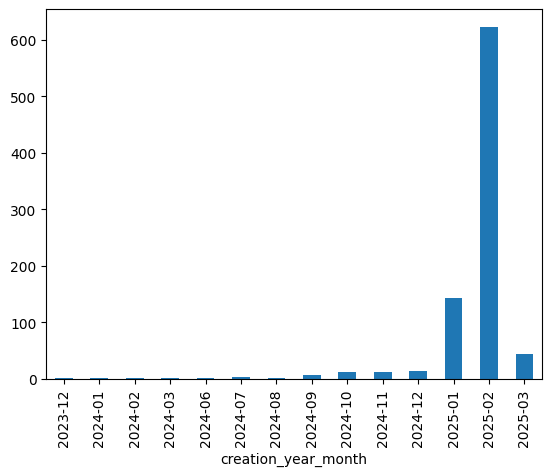

In [35]:
by_date= df.groupby('creation_year_month')
by_date.size().plot(kind='bar')

In [36]:
df=df.loc[df.creation_year_month>'2025-01']

In [37]:
df.shape

(668, 26)

In [38]:
'''data limitation: for key word search, we are only able to obtain around 200+notes for each key words, 
base on above plots and filter, decide to keep only 2025 feb onwards data to obtain relative fair overview'''

'data limitation: for key word search, we are only able to obtain around 200+notes for each key words, \nbase on above plots and filter, decide to keep only 2025 feb onwards data to obtain relative fair overview'

<Axes: xlabel='creation_date'>

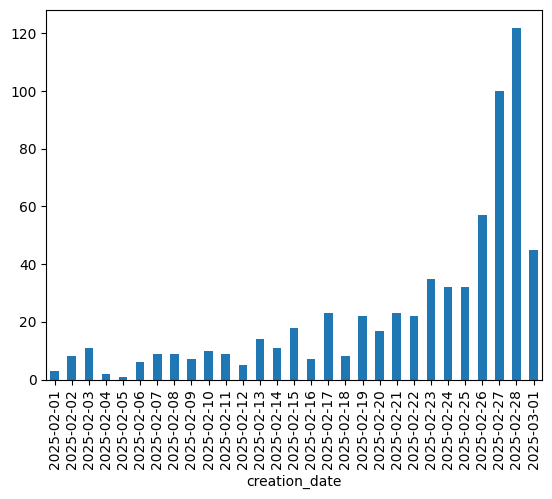

In [39]:
by_date= df.groupby('creation_date')
by_date.size().plot(kind='bar')

In [40]:
#getting Key figures
total_likes = sum(df['liked_count_parsed'])
total_collects = sum(df['collected_count_parsed'])
total_comments = sum(df['comment_count_parsed'])
total_shares = sum(df['share_count_parsed'])
print([total_likes,total_collects,total_comments,total_shares])

[1819874, 240123, 98778, 115514]


In [41]:
avg_likes = round(total_likes/df.shape[0])
avg_collects = round(total_collects/df.shape[0])
avg_comments = round(total_comments/df.shape[0])
avg_shares = round(total_shares/df.shape[0])
print([avg_likes,avg_collects,avg_comments,avg_shares])

[2724, 359, 148, 173]


In [42]:
#top liked post
df.sort_values('liked_count_parsed',ascending=False)[['title','desc','liked_count_parsed']]

,title,desc,liked_count_parsed
220,消失的一年里，夏以昼一直这样看着你……,﻿#恋与深空[话题]#﻿ ﻿#夏以昼[话题]#﻿ ﻿#沈星回[话题]#﻿ ﻿#秦彻[话题]#...,76000
211,躲什么，刚刚胆子不是还很大吗？| 夏以昼cos,#恋与深空[话题]# #夏以昼[话题]# #恋与深空明日无处可逃[话题]# #cos[话题]...,65000
2,和他们走这么近 你要逼死哥哥吗,#夏以昼[话题]# #恋与深空[话题]# #cos[话题]# #西装跪[话题]#\n#夏以昼...,63000
4,夏以昼娃娃机杀手,从来没有一次抓这么多过[doge]跟哥抓娃娃太爽了[哇R]#恋与深空[话题]# #恋与深空夏...,48000
6,“大笨蛋夏以昼！不是亲的也可以亲啊！！！”,路人学生：磕到了，这个是真磕到了\n#恋与深空[话题]# #夏以昼[话题]#,41000
...,...,...,...
2,就这么和夏以昼叱咤风云😼,过了两年，妹也偷偷去参加了比武大会，各家很快就认出来妹用的招式是夏以昼的影子\n妹和哥一样默...,0
60,饿饿饭饭，有没有夏以昼的同人公路文好想吃#夏以昼[话题]# #书荒求推荐[话题]# #恋与深...,饿饿饭饭，有没有夏以昼的同人公路文好想吃#夏以昼[话题]# #书荒求推荐[话题]# #恋与深...,0
68,叠，你有夏以昼这么伟大的脸进入天行……,#恋与深空[话题]##夏以昼[话题]##自组ob11[话题]##萌[话题]#\n是你的荣幸哈...,0
38,夏以昼全图卡一有500衣,#恋与深空夏以昼[话题]# #恋与深空[话题]#,0


In [43]:
#top liked creator
df_creator = df.groupby("user_id").agg(
    total_likes=("liked_count_parsed", "sum"),
    total_collects=("collected_count_parsed", "sum"),
    total_comments=("comment_count_parsed", "sum"),
    total_shares=("share_count_parsed", "sum"),
    avg_likes=("liked_count_parsed", "mean"),
    avg_collects=("collected_count_parsed", "mean"),
    avg_comments=("comment_count_parsed", "mean"),
    avg_shares=("share_count_parsed", "mean"),
    post_count=("note_id", "count")
).reset_index()
df_creator = pd.merge(df_creator,df, how='left',on='user_id')
df_creator = df_creator.loc[:,['user_id', 'post_count','nickname', 'ip_location',
                               'total_likes','total_collects','total_comments','total_shares',
                               'avg_likes','avg_collects','avg_comments','avg_shares']]
df_creator.drop_duplicates('user_id').sort_values("avg_likes", ascending=False)

,user_id,post_count,nickname,ip_location,total_likes,total_collects,total_comments,total_shares,avg_likes,avg_collects,avg_comments,avg_shares
114,5c32153a0000000007009f43,1,蒙德诺,广东,76000,6831,2303,5733,76000.0,6831.0,2303.0,5733.0
19,5812d6615e87e74666be5148,1,未岚RAN,四川,65000,6751,1893,6893,65000.0,6751.0,1893.0,6893.0
209,5ef717640000000001003693,1,7x2,上海,63000,7291,1345,1607,63000.0,7291.0,1345.0,1607.0
407,63b7fa63000000002801b577,1,纾忱,安徽,48000,2002,2664,4753,48000.0,2002.0,2664.0,4753.0
633,6770012f0000000015005da0,1,来一份🍎pie,重庆,37000,3093,393,433,37000.0,3093.0,393.0,433.0
...,...,...,...,...,...,...,...,...,...,...,...,...
325,61aa1e340000000021027ce8,1,阿嬴_（乙女剧情搬运版）,上海,0,1,0,1,0.0,1.0,0.0,1.0
572,66876185000000001b016a5a,1,卷鱼饼拆卡（重生版）,江西,0,0,0,0,0.0,0.0,0.0,0.0
573,66893f6f000000000f0373c1,1,电子消毒水,浙江,0,0,4,0,0.0,0.0,4.0,0.0
600,66f9403d000000001d03120b,1,窝窝袜袜🧦,江苏,0,0,0,0,0.0,0.0,0.0,0.0


In [44]:
#tag analysis
df['tags'] = df['tags'].apply(lambda x: x if isinstance(x, list) else [])  # Ensure it's a list
unique_tags = sorted(set(itertools.chain.from_iterable(df['tags'])))

In [45]:
co_occurrence = pd.DataFrame(0, index=unique_tags, columns=unique_tags)
for tag_list in df['tags']:
    for tag1, tag2 in itertools.combinations(tag_list, 2):
        co_occurrence.loc[tag1, tag2] += 1
        co_occurrence.loc[tag2, tag1] += 1  # Ensure symmetry
for tag in unique_tags:
    co_occurrence.loc[tag, tag] = sum(df['tags'].apply(lambda x: tag in x))

# Convert the matrix into a long-format DataFrame
co_occurrence_df = (
    co_occurrence.stack()
    .reset_index()
    .rename(columns={"level_0": "tag1", "level_1": "tag2", 0: "CoOccurrence"})
)

co_occurrence_df['combined_tag_1'] = co_occurrence_df['tag1'] + '-' + co_occurrence_df['tag2']
co_occurrence_df['combined_tag_2'] = co_occurrence_df['tag2'] + '-' + co_occurrence_df['tag1']
co_occurrence_df['drop_indicator'] = co_occurrence_df['combined_tag_1'] > co_occurrence_df['combined_tag_2']
co_occurrence_df = co_occurrence_df[~co_occurrence_df['drop_indicator']].drop(columns=['drop_indicator',
                                                                                      'combined_tag_1',
                                                                                      'combined_tag_2'])

# Sort by co-occurrence count (descending)
co_occurrence_df = co_occurrence_df.sort_values(by="CoOccurrence", ascending=False)
co_occurrence_df

,tag1,tag2,CoOccurrence
67596,夏以昼,夏以昼,558
126808,恋与深空,恋与深空,456
67709,夏以昼,恋与深空,408
137288,恋与深空夏以昼,恋与深空夏以昼,350
67729,夏以昼,恋与深空夏以昼,277
...,...,...,...
13,,bjd妆,0
14,,caleb,0
15,,cattax,0
16,,cos,0


In [46]:
# Create co-occurrence matrix (reusing previous co-occurrence calculation)
top_pairs = co_occurrence_df.sort_values(by="CoOccurrence", ascending=False).head(20)
filtered_matrix = top_pairs.pivot(index='tag1', columns='tag2', values='CoOccurrence').fillna(0)

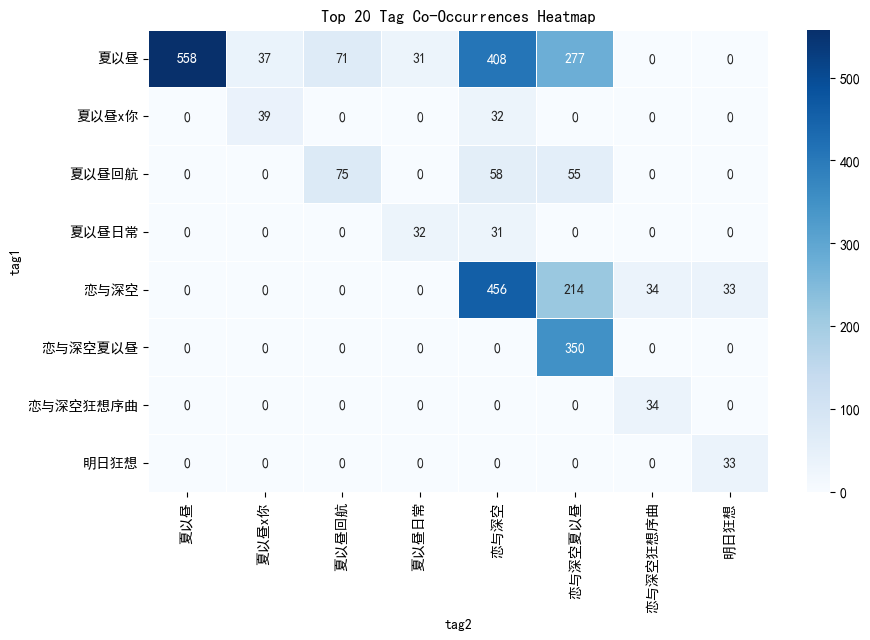

In [47]:
# Set Chinese font
plt.rcParams["font.sans-serif"] = ["SimHei"]  # Use SimHei (黑体) for Chinese support
plt.rcParams["axes.unicode_minus"] = False  # Fix display of minus signs
# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(filtered_matrix, cmap="Blues", annot=True, fmt=".0f", linewidths=0.5)
plt.title("Top 20 Tag Co-Occurrences Heatmap")
plt.show()

In [48]:
#explore popular tags
all_tags = list(itertools.chain.from_iterable(df['tags']))
tag_counts = Counter(all_tags)
tag_counts_df = pd.DataFrame(tag_counts.items(), columns=['Tag', 'Count'])
tag_counts_df = tag_counts_df.sort_values(by='Count', ascending=False)
print(tag_counts_df.shape)
print(tag_counts_df.head(10))  # Show top 50 most popular tags

(523, 2)
          Tag  Count
7         夏以昼    558
0        恋与深空    456
12    恋与深空夏以昼    350
32      夏以昼回航     75
19      夏以昼x你     39
131  恋与深空狂想序曲     34
150      明日狂想     33
78      夏以昼日常     32
3         沈星回     28
4          黎深     27


In [49]:
#check popular tag coverage
# Select top N tags
top_n = 10 
top_tags = tag_counts_df['Tag'].head(top_n)
df['has_top_tag'] = df['tags'].apply(lambda x: any(tag in x for tag in top_tags))
df.head()
top_tag_coverage = df['has_top_tag'].mean() * 100  # Percentage of posts with top N tags
print(f"Top {top_n} tags appear in {top_tag_coverage:.2f}% of all posts.")

Top 10 tags appear in 97.46% of all posts.


In [50]:
# Sort tags by coverage percentage
total_tag_count = tag_counts_df['Count'].sum()
tag_counts_df['Coverage'] = (tag_counts_df['Count'] / total_tag_count) * 100
tag_counts_df = tag_counts_df.sort_values(by="Coverage", ascending=False)
# Keep only the top tags
top_n = 10
top_tags_df = tag_counts_df.head(top_n).copy()
top_tags_df
other_coverage = tag_counts_df.iloc[top_n:]['Coverage'].sum()
top_tags_df.loc[len(top_tags_df)] = ["Other Tags", tag_counts_df.iloc[top_n:]['Coverage'].sum(), other_coverage]

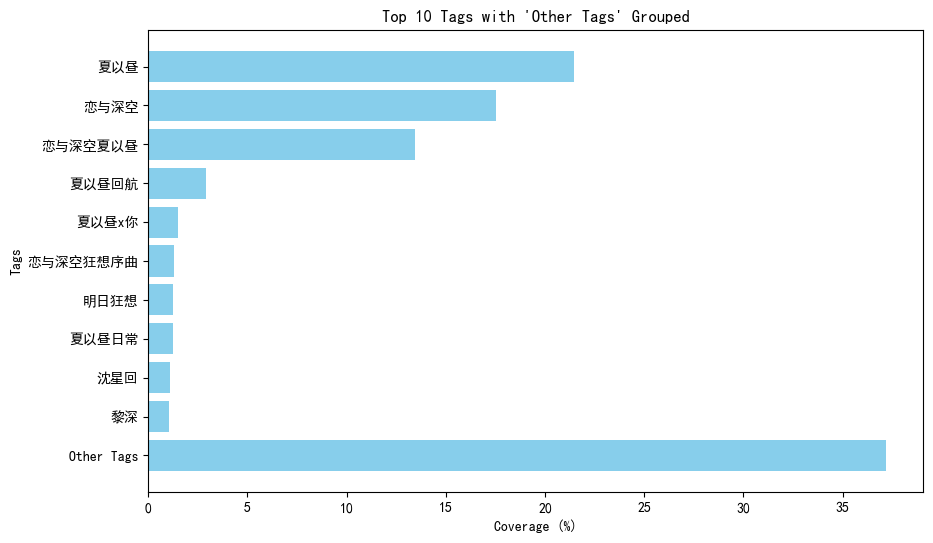

In [51]:
# Plot horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_tags_df['Tag'], top_tags_df['Coverage'], color='skyblue')
plt.xlabel("Coverage (%)")
plt.ylabel("Tags")
plt.title("Top 10 Tags with 'Other Tags' Grouped")
plt.gca().invert_yaxis()  # Invert for better readability
plt.show()

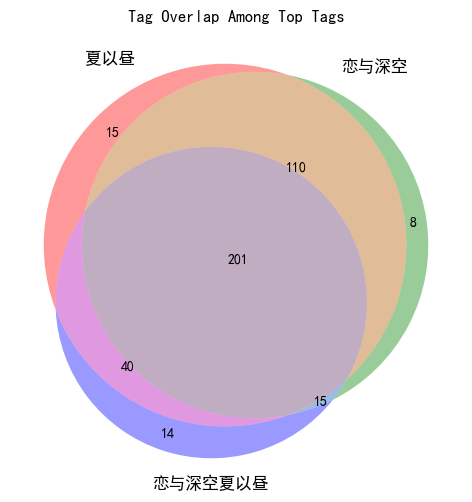

In [52]:
tag1 = "夏以昼"
tag2 = "恋与深空"
tag3 = "恋与深空夏以昼"

# Create boolean series for each tag
set1 = set(df[df['tags'].apply(lambda x: tag1 in x)].index)
set2 = set(df[df['tags'].apply(lambda x: tag2 in x)].index)
set3 = set(df[df['tags'].apply(lambda x: tag3 in x)].index)
# Plot Venn Diagram
plt.figure(figsize=(6, 6))
venn3([set1, set2, set3], set_labels=(tag1, tag2, tag3))
plt.title("Tag Overlap Among Top Tags")
plt.show()

In [53]:
#ip analysis
df['ip_location'].unique()

array(['河北', '江苏', '广西', '湖北', '北京', '广东', '四川', '山东', '上海', '黑龙江', '福建',
       '日本', '浙江', '贵州', '河南', '辽宁', '陕西', '山西', '湖南', '西班牙', '江西',
       '中国台湾', '安徽', '天津', '加拿大', '重庆', '吉林', '澳大利亚', '英国', '海南', '新加坡',
       '云南', '美国', '印度尼西亚', '新疆', '菲律宾', '内蒙古', '中国澳门', '沙特阿拉伯', '中国香港',
       '甘肃', '马来西亚', '意大利', '挪威'], dtype=object)

In [54]:
df_ip = df.groupby('ip_location').agg(
    total_likes=("liked_count_parsed", "sum"),
    total_collects=("collected_count_parsed", "sum"),
    total_comments=("comment_count_parsed", "sum"),
    total_shares=("share_count_parsed", "sum"),
    avg_likes=("liked_count_parsed", "mean"),
    avg_collects=("collected_count_parsed", "mean"),
    avg_comments=("comment_count_parsed", "mean"),
    avg_shares=("share_count_parsed", "mean"),
    post_count=("note_id", "count")
).reset_index()
df_ip.sort_values('post_count',ascending=False)

,ip_location,total_likes,total_collects,total_comments,total_shares,avg_likes,avg_collects,avg_comments,avg_shares,post_count
15,广东,274808,43341,14118,18364,3019.868132,476.274725,155.142857,201.802198,91
22,江苏,104530,14951,7889,11274,2133.265306,305.122449,161.000000,230.081633,49
27,浙江,123715,14851,9388,7937,2577.395833,309.395833,195.583333,165.354167,48
0,上海,153250,21521,6808,4496,3260.638298,457.893617,144.851064,95.659574,47
25,河北,9107,673,1954,345,216.833333,16.023810,46.523810,8.214286,42
10,四川,155079,20785,6607,12304,4081.026316,546.973684,173.868421,323.789474,38
7,北京,93548,12158,5115,4917,2672.800000,347.371429,146.142857,140.485714,35
13,山东,57952,6923,2537,5986,1811.000000,216.343750,79.281250,187.062500,32
39,辽宁,66987,9095,4965,6852,2093.343750,284.218750,155.156250,214.125000,32
29,湖北,29540,3794,2795,1940,1230.833333,158.083333,116.458333,80.833333,24


In [55]:
# Define list of Chinese provinces/regions
china_regions = [
    '河北', '江苏', '广西', '湖北', '北京', '广东', '四川', '山东', '上海', '黑龙江', '福建',
    '浙江', '贵州', '河南', '辽宁', '陕西', '山西', '湖南', '江西', '中国台湾', '安徽',
    '天津', '重庆', '吉林', '海南', '云南', '新疆', '内蒙古', '中国澳门', '中国香港', '甘肃'
]

df_ip['ip_location_grouped'] = df_ip['ip_location'].apply(
    lambda x: x if (x in china_regions) or 
                ((x not in china_regions) and 
                 ((df_ip.loc[df_ip['ip_location'] == x, 'post_count'].values[0] > 5) or 
                  (df_ip.loc[df_ip['ip_location'] == x, 'total_likes'].values[0] >= 1000)))
    else "Others"
)

In [56]:
#recalculate figures for "others"
ip_groups = df_ip['ip_location_grouped'].unique()
df['ip_location_grouped'] = df['ip_location'].apply(
    lambda x: x if (x in ip_groups) 
    else "Others"
)

df_ip_grouped = df.groupby('ip_location_grouped').agg(
    total_likes=("liked_count_parsed", "sum"),
    total_collects=("collected_count_parsed", "sum"),
    total_comments=("comment_count_parsed", "sum"),
    total_shares=("share_count_parsed", "sum"),
    avg_likes=("liked_count_parsed", "mean"),
    avg_collects=("collected_count_parsed", "mean"),
    avg_comments=("comment_count_parsed", "mean"),
    avg_shares=("share_count_parsed", "mean"),
    post_count=("note_id", "count")
).reset_index()
df_ip_grouped.sort_values('post_count',ascending=False)

,ip_location_grouped,total_likes,total_collects,total_comments,total_shares,avg_likes,avg_collects,avg_comments,avg_shares,post_count
15,广东,274808,43341,14118,18364,3019.868132,476.274725,155.142857,201.802198,91
22,江苏,104530,14951,7889,11274,2133.265306,305.122449,161.000000,230.081633,49
26,浙江,123715,14851,9388,7937,2577.395833,309.395833,195.583333,165.354167,48
1,上海,153250,21521,6808,4496,3260.638298,457.893617,144.851064,95.659574,47
24,河北,9107,673,1954,345,216.833333,16.023810,46.523810,8.214286,42
10,四川,155079,20785,6607,12304,4081.026316,546.973684,173.868421,323.789474,38
8,北京,93548,12158,5115,4917,2672.800000,347.371429,146.142857,140.485714,35
13,山东,57952,6923,2537,5986,1811.000000,216.343750,79.281250,187.062500,32
36,辽宁,66987,9095,4965,6852,2093.343750,284.218750,155.156250,214.125000,32
28,湖北,29540,3794,2795,1940,1230.833333,158.083333,116.458333,80.833333,24


In [57]:
df_ip_grouped['ip_location_grouped'].unique()

array(['Others', '上海', '中国台湾', '中国澳门', '中国香港', '云南', '内蒙古', '加拿大', '北京',
       '吉林', '四川', '天津', '安徽', '山东', '山西', '广东', '广西', '意大利', '挪威', '新加坡',
       '新疆', '日本', '江苏', '江西', '河北', '河南', '浙江', '海南', '湖北', '湖南', '澳大利亚',
       '甘肃', '福建', '美国', '英国', '贵州', '辽宁', '重庆', '陕西', '马来西亚', '黑龙江'],
      dtype=object)

In [57]:
tag_counts_df.head(20)

,Tag,Count,Coverage
7,夏以昼,558,21.469796
0,恋与深空,456,17.545210
12,恋与深空夏以昼,350,13.466718
32,夏以昼回航,75,2.885725
19,夏以昼x你,39,1.500577
131,恋与深空狂想序曲,34,1.308195
150,明日狂想,33,1.269719
78,夏以昼日常,32,1.231243
3,沈星回,28,1.077337
4,黎深,27,1.038861


In [58]:
#explore relationship between like and comments
#try to group general posts and single-character posts - base on my own understanding of players' social media behavior 
exclude_tags = ['沈星回','黎深','秦彻','祁煜']
caleb_tags = ['夏以昼','恋与深空夏以昼','夏以昼回航','夏以昼x你','Caleb','爱在夏以昼','夏以昼同人','夏以昼回来','夏以昼日常']

def classify_post(tags):
    tags_set = set(tags)  # Convert list to set for fast lookup
    if any(tag in tags_set for tag in caleb_tags):  # Rule 1: Caleb-related tags exist
        if any(tag in tags_set for tag in exclude_tags):  # Rule 2: Exclude tags exist
            return "General Post"
        return "Caleb Post"
    return "General Post"  # Default if no Caleb tags found

df['post_type'] = df['tags'].apply(classify_post)

#quick eye-scan to check relevancy
df[['tags', 'title','post_type']].tail(50)

,tags,title,post_type
87,"[夏以昼, 恋与深空夏以昼]",就喜欢和哥哥玩过家家,Caleb Post
91,"[恋与深空, 沈星回, 祁煜, 夏以昼, 秦彻, 黎深]",宝宝巴士🚌,General Post
92,"[恋与深空, 夏以昼, 恋与深空夏以昼, 怪不好意思的, 夏以昼回航, 夏以昼日常]",哥哥 对不起…,Caleb Post
109,"[夏以昼, 恋与深空, 恋与深空夏以昼]",好想你好想你 右滑全图👉🏻,Caleb Post
114,"[恋与深空夏以昼, 恋与深空, 摸鱼]",急！惹妹妹生气了怎么办？,Caleb Post
121,"[恋与深空, 夏以昼, 事情开始变得有趣了]",故意给哥看见了聊天记录,Caleb Post
126,"[恋与深空, 夏以昼]",焦糖布丁熊，进来rua一下,Caleb Post
140,[夏以昼],我们罪名相同，我们会有自己的伊甸园,Caleb Post
143,"[恋与深空, 恋与深空狂想序曲, 明日狂想, 恋与深空夏以昼, 夏以昼, 夏以昼回航, 夏以...",夏以昼，你这身衣服只能在家穿知道吗？,Caleb Post
147,"[恋与深空, 恋与深空夏以昼, 夏以昼回航, 有点暧昧了, 你就宠我吧]",哥超强占有欲证据加一,Caleb Post


In [73]:
# Calculate comment-to-like ratio
df['comment_like_ratio'] = df.apply(
    lambda row: row['comment_count_parsed'] / row['liked_count_parsed'] if row['liked_count_parsed'] > 0 else None, 
    axis=1
)
df_comments = df.dropna(subset=['comment_like_ratio'])
df_comments[['tags', 'title','post_type','comment_like_ratio']].sort_values('comment_like_ratio',ascending = False)

,tags,title,post_type,comment_like_ratio
143,"[恋与深空, 秦彻, 黎深, 夏以昼]",啊啊啊！恋与深空要拍成电视剧了！！！,General Post,100.0
313,"[恋与深空夏以昼, 恋与深空代打]",找夏以昼试炼50关代打#恋与深空夏以昼[话题]# #恋与深空代打[话题]# ，是官服的,Caleb Post,46.0
23,"[恋与深空夏以昼, 夏以昼, 恋与深空好友]",有没有夏以昼单推➕我🥹,Caleb Post,21.0
430,"[恋与深空, 夏以昼, 这对我真的很重要]",收收收,Caleb Post,13.5
306,"[恋与深空, 恋与深空夏以昼, 恋与深空代肝]",蹲个lysk代打，打夏以昼50轨道\n\t\n#恋与深空[话题]# #恋与深空夏以昼[话题]...,Caleb Post,13.0
...,...,...,...,...
35,"[夏以昼, 恋与深空夏以昼, 恋与深空]",夏以昼牵绊度 83 级，无尽夏满花,Caleb Post,0.0
45,"[夏以昼, 恋与深空]",我求你放过夏以昼吧夏以昼真的不会这么说话,Caleb Post,0.0
40,"[恋与深空夏以昼, 夏以昼]",我不喜欢，因为海棠花会把夏以昼带走,Caleb Post,0.0
9,"[恋与深空夏以昼, 夏以昼, 夏以昼回航]",欢迎回家，夏以昼,Caleb Post,0.0


In [74]:
#exclude outliers
df_comments = df_comments.drop(index=[143,313,23,430,306])
df_comments[['tags', 'title','post_type','comment_like_ratio']].sort_values('comment_like_ratio',ascending = False)

,tags,title,post_type,comment_like_ratio
223,"[恋与深空夏以昼, 夏以昼]",想知道小苹果们最喜欢夏以昼哪套衣服or卡面[哇R]\n#恋与深空夏以昼[话题]# #夏以昼[...,Caleb Post,10.000000
389,"[恋与深空, 黎深, 夏以昼, 恋与深空明日序曲, 恋与深空明日无处可逃, 恋与深空狼尾混池]",选黎深还是夏以昼💧,General Post,9.000000
84,"[恋与深空夏以昼, 夏以昼10cm娃娃, 夏以昼]",求推荐！夏以昼10cm娃娃[合十R]#恋与深空夏以昼[话题]# #夏以昼10cm娃娃[话题]...,Caleb Post,8.750000
311,"[恋与深空, 恋与深空夏以昼]",是的我又来了，接夏以昼轨道50无偿代打[doge]#恋与深空[话题]# #恋与深空夏以昼[话...,Caleb Post,7.333333
304,"[恋与深空夏以昼, 夏以昼, 恋与深空轨道试炼]",夏以昼定轨50层到底怎么过啊😭#恋与深空夏以昼[话题]# #夏以昼[话题]# #恋与深空轨道...,Caleb Post,6.666667
...,...,...,...,...
15,"[夏以昼, nymyxgwcldbsndgg]",夏以昼男高时候,Caleb Post,0.000000
11,[夏以昼],夏以昼开新品发布会,Caleb Post,0.000000
14,"[恋与深空, 恋与深空夏以昼, 夏以昼]",#恋与深空[话题]# [红色心形R]#恋与深空夏以昼[话题]# [红色心形R]#夏以昼[话题...,Caleb Post,0.000000
5,"[恋与深空, 夏以昼, 军装, 立牌, 吧唧, 徽章]",酷帅酷帅的哥哥夏以昼！,Caleb Post,0.000000


C:\Users\Jasmine\AppData\Local\Temp\ipykernel_2784\1133204384.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_comments['post_type'], y=df_comments['comment_like_ratio'], palette="Blues")


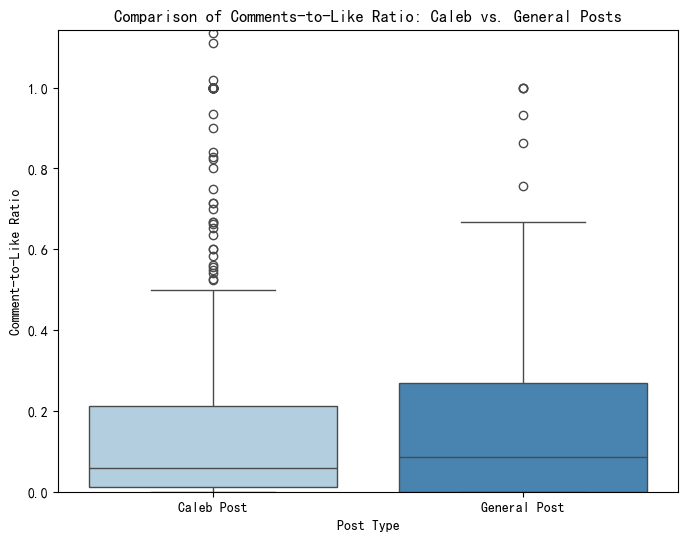

In [76]:
# Boxplot to compare General vs. Caleb posts
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_comments['post_type'], y=df_comments['comment_like_ratio'], palette="Blues")
plt.ylim(0, df['comment_like_ratio'].quantile(0.95))  # Crop at the 95th percentile
plt.ylabel("Comment-to-Like Ratio")
plt.xlabel("Post Type")
plt.title("Comparison of Comments-to-Like Ratio: Caleb vs. General Posts")
plt.show()

<Figure size 800x600 with 0 Axes>

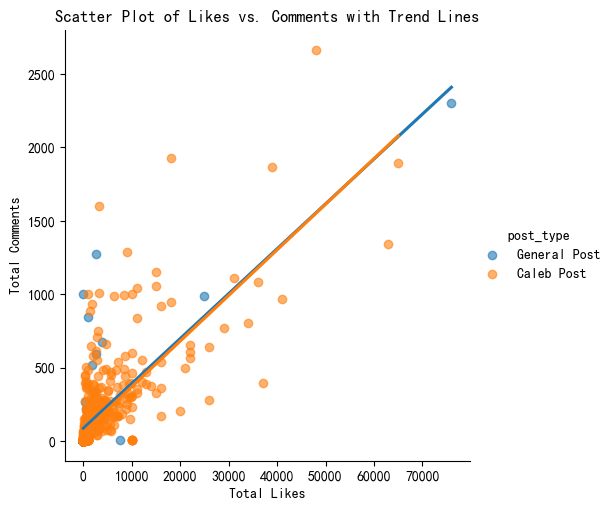

In [77]:
# Scatter plot of likes vs. comments
plt.figure(figsize=(8, 6))
sns.lmplot(
    data=df, 
    x="liked_count_parsed", 
    y="comment_count_parsed", 
    hue="post_type", 
    ci=None, 
    scatter_kws={"alpha": 0.6}
)

plt.xlabel("Total Likes")
plt.ylabel("Total Comments")
plt.title("Scatter Plot of Likes vs. Comments with Trend Lines")
plt.show()
